<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Открытие-файла-и-изучение-данных" data-toc-modified-id="Шаг-1.-Открытие-файла-и-изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Открытие файла и изучение данных</a></span></li><li><span><a href="#Шаг-2.-Предобработка-данных" data-toc-modified-id="Шаг-2.-Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типов-данных" data-toc-modified-id="Замена-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типов данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Категоризация данных</a></span></li></ul></li><li><span><a href="#Шаг-3.-Ответы-на-вопросы-исследования" data-toc-modified-id="Шаг-3.-Ответы-на-вопросы-исследования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Ответы на вопросы исследования</a></span><ul class="toc-item"><li><span><a href="#Есть-ли-зависимость-между-количеством-детей-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-количеством-детей-и-возвратом-кредита-в-срок?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Есть ли зависимость между количеством детей и возвратом кредита в срок?</a></span></li><li><span><a href="#Есть-ли-зависимость-между-семейным-положением-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-семейным-положением-и-возвратом-кредита-в-срок?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Есть ли зависимость между семейным положением и возвратом кредита в срок?</a></span></li><li><span><a href="#Есть-ли-зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Есть ли зависимость между уровнем дохода и возвратом кредита в срок?</a></span></li><li><span><a href="#Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?" data-toc-modified-id="Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Как разные цели кредита влияют на его возврат в срок?</a></span></li></ul></li><li><span><a href="#Шаг-4.-Общий-вывод" data-toc-modified-id="Шаг-4.-Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Общий вывод</a></span></li></ul></div>

# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Нужно ответить на вопросы:
- Есть ли зависимость между количеством детей и возвратом кредита в срок?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Открытие файла и изучение данных

Импортируем нужные для проекта библиотеки. Cохраним файл `data.csv` из папки `/datasets` в переменную `df`. Выведем первые 10 строк таблицы.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pymystem3 import Mystem
from collections import Counter

data = pd.read_csv('/datasets/data.csv')
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Получим общую информацию о таблице:

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Вывод**

Итак, в таблице 12 столбцов. Типы данных в столбцах — `int, float, object`. Количетво строк - 21525.

Согласно документации к данным:
* `children` — количество детей в семье;
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита

Названия колонок соответвуют стилю Snake case.

Количество значений в столбцах отличается. Из этого следует, что в столбах `days_employed` и `total_income` есть пропущенные значения.

## Шаг 2. Предобработка данных

### Обработка пропусков

Пропуски есть в столбцах `days_employed` и `total_income`.

`days_employed` и `total_income` - это количественные переменные. Выведем количество пропущенных значений в этих столбцах.

In [3]:
print('Количество пропущенных значений days_employed:', len(data[data['days_employed'].isna()]))
print('Количество пропущенных значений total_income:', len(data[data['total_income'].isna()]))

Количество пропущенных значений days_employed: 2174
Количество пропущенных значений total_income: 2174


Выведем первые 5 строк, в которых значение `days_employed` - NaN.

In [4]:
data[data['days_employed'].isna()].head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


Выглядит так, что значения `days_employed` и `total_income` пропущенны в одних и тех же строках. Давайте проверим это предположение с помощью вычислений и на графике `heatmap`, с помощью библиотеки `seaborn`.

Число строк, в которых пропущены и days_employed, и total_income: 2174


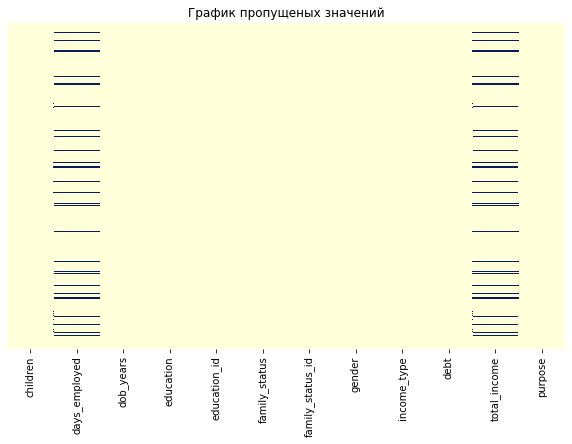

In [5]:
print('Число строк, в которых пропущены и days_employed, и total_income:', 
      len(data[(data['days_employed'].isna()) & (data['total_income'].isna())]))

# построение графика
plt.figure(figsize=(10, 6))
plt.title('График пропущеных значений')
sns.heatmap(data.isna(), yticklabels=False, cbar=False, cmap="YlGnBu");
plt.show()

То есть в таблице все пустые значения встречаются обновременнно в общем трудовом стаже в днях и ежемесячном доходе. Возможно данные потерялись при выгрузках, возможно их просто нет.

В столбцах пропущенно по 2174 значений, что составляет 10% отвсех данных. Следовательно их удаление или замена на 0 сильно повлияют на результаты исследования. Пропуски необхимо заменить средними или медианными значениями.

Также посмотрим на распределения значений `days_employed` и `total_income` с помошью метода `describe()` для выявления аномалий.

In [6]:
print('Eжемесячный доход total_income:')
print(data['total_income'].describe().round(2))
print('-'*45)
print('Трудовой стаж в днях days_employed:')
print(data['days_employed'].describe().round(2))

Eжемесячный доход total_income:
count      19351.00
mean      167422.30
std       102971.57
min        20667.26
25%       103053.15
50%       145017.94
75%       203435.07
max      2265604.03
Name: total_income, dtype: float64
---------------------------------------------
Трудовой стаж в днях days_employed:
count     19351.00
mean      63046.50
std      140827.31
min      -18388.95
25%       -2747.42
50%       -1203.37
75%        -291.10
max      401755.40
Name: days_employed, dtype: float64


Мы видим аномалии в столбце `days_employed`. Отрицательные и очень больше значения скорее всего встречаются из-за другой системы записи данных.

226504 дня - это примерно 620 лет. А если 226504 - это часы, то получится стаж 25 лет. Либо в таблице содержится информация о вампирах, либо аномально большие значения трудового стажа указаны в часах.

Возьмем стаж в 70 лет, это примерно 25550 дней. А значения выше этой цифры поделим на 24, чтобы привести трудовой стаж к единому формату - дням. Отрицательные значения возьмем по модулю, применяя к столбцу метод `apply()`.

In [7]:
data['days_employed'] = data['days_employed'].apply(abs)
data.loc[data['days_employed'] > 25550, 'days_employed'] = data.loc[data['days_employed'] > 25550, 'days_employed'] / 24


Посмотрим на минимальное и максимально знаечения трудового стажа:

In [8]:
print('Трудовой стаж в днях:', data['days_employed'].min(), data['days_employed'].max())

Трудовой стаж в днях: 24.14163324048118 18388.949900568383


Заменим пропуски в столбщах `days_employed` и `total_income` на средние значения в группе по типу занятости. Парметр `income_type` самый подходящий для группировки, так как доход и трудовой стаж сильно отличается именно в зависимости от типа занятости.

Сначала посмотрим на уникальные значения столбца `income_type`:

In [9]:
data['income_type'].unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

Пройдем в цикле по уникальным значениям `income_type` и сделаем замену пропусков в столбцах `days_employed`, `total_income` на средние значения:

In [10]:
for income_type in data['income_type'].unique():
    mean_days_employed = data.loc[data['income_type'] == income_type, 'days_employed'].mean()
    mean_total_income = data.loc[data['income_type'] == income_type, 'total_income'].mean()
    print(f'Для группы \"{income_type}\" средний трудовой стаж в днях {mean_days_employed}, средний ежемесячный доход {mean_total_income}')
    data.loc[(data['income_type'] == income_type) & 
             (data['days_employed'].isna()), 'days_employed'] = mean_days_employed
    data.loc[(data['income_type'] == income_type) & 
             (data['total_income'].isna()), 'total_income'] = mean_total_income
    

Для группы "сотрудник" средний трудовой стаж в днях 2326.4992159717935, средний ежемесячный доход 161380.26048788553
Для группы "пенсионер" средний трудовой стаж в днях 15208.478801869218, средний ежемесячный доход 137127.4656901654
Для группы "компаньон" средний трудовой стаж в днях 2111.524398297732, средний ежемесячный доход 202417.4614617771
Для группы "госслужащий" средний трудовой стаж в днях 3399.89690169574, средний ежемесячный доход 170898.30992266268
Для группы "безработный" средний трудовой стаж в днях 15267.235531008522, средний ежемесячный доход 131339.7516762103
Для группы "предприниматель" средний трудовой стаж в днях 520.8480834953765, средний ежемесячный доход 499163.1449470857
Для группы "студент" средний трудовой стаж в днях 578.7515535382181, средний ежемесячный доход 98201.62531401133
Для группы "в декрете" средний трудовой стаж в днях 3296.7599620220594, средний ежемесячный доход 53829.13072905995


Теперь еще раз выведем общую информацию о таблице, чтобы убедиться в том, что пропущенных значений больше нет.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Теперь во всех столбцах 21525 значений.

Рассмотрим оставшиеся количественные значения, это столбцы `children`, `dob_years`. Посмотрим на распределения их значения для выявления аномалий.

In [12]:
print('Количество детей children:')
print(data['children'].describe())
print('-'*45)
print('Возраст клиента dob_years:')
print(data['dob_years'].describe())

Количество детей children:
count    21525.000000
mean         0.538908
std          1.381587
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64
---------------------------------------------
Возраст клиента dob_years:
count    21525.000000
mean        43.293380
std         12.574584
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64


Скорее всего количество детей -1 означает отсутствие детей, значение можно заменить на 0, а 20 - это опечатка, которую заменим на 2.

In [13]:
data['children'] = data['children'].replace({-1: 0, 20: 2})

Нулевой возраст клиентов выглядит подозрительно, посмотрим на количество таких строк.

In [14]:
data[data['dob_years'] == 0]['dob_years'].count()

101

Заменим нулевой возраст клиентов на средний в выборке по типу занятости.

In [15]:
for income_type in data['income_type'].unique():
    mean_dob_years = data.loc[data['income_type'] == income_type, 'dob_years'].mean()
    print(f'Для группы \"{income_type}\" средний возраст {mean_dob_years}')
    data.loc[(data['income_type'] == income_type) & 
             (data['dob_years'] == 0), 'dob_years'] = mean_dob_years

Для группы "сотрудник" средний возраст 39.82102707077975
Для группы "пенсионер" средний возраст 59.06301867219917
Для группы "компаньон" средний возраст 39.69754178957719
Для группы "госслужащий" средний возраст 40.63673749143249
Для группы "безработный" средний возраст 38.0
Для группы "предприниматель" средний возраст 42.5
Для группы "студент" средний возраст 22.0
Для группы "в декрете" средний возраст 39.0


После замен проверим минимальные и максимальные значения столбцов `children` и `dob_years` еще раз.

In [16]:
print('Количество детей:', data['children'].min(), data['children'].max())
print('Возраст клиента:', data['dob_years'].min(), data['dob_years'].max())

Количество детей: 0 5
Возраст клиента: 19.0 75.0


Теперь все количественные переменные в порядке.

**Вывод**

В процессе обработки пропусков были рассмотренны количественные переменные. Были выявленны пропущенные значения и некоторые аномалии: слишком большие, отрицательные, нулевые значения.

Отрицательные значени столбца `days_employed` заменены на модуль этих чисел, слишком больше означают запись стажа в часах, переведены в дни. В столбце `children` - количество детей значение -1 заменено на 0, так как означаает отсутвие детей у клиента, а 20 на 2, скорее всего это опечатка.

В столбцах `days_employed` - трудовой стаж в днях и `total_income` - ежемесячный доход были пустые 2174 строки (причем совпадающие), а в переменной `dob_years` - возраст клиента 101 строка, содержащая 0. Эти значения были заменены на средние значения в группе по типу занятости - `income_type`, так как это самые значимые категории, влияющие на значения.

Таким образом мы обработали все пропущенные значения исходной таблицы.

### Замена типов данных

Выведем типы данных таблицы `dtypes`:

In [17]:
data.dtypes

children              int64
days_employed       float64
dob_years           float64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

Значения столбцов `days_employed` (общий трудовой стаж в днях), `dob_years` (возраст клиента в годах) - числа с плавающей точкой. Приведем их к целочисленному формату с помощью метода `astype()` с указанием типа `int`. 

Если бы нужно было сделать целочисленный тип данных из строк, то использовали бы `to_numeric()`, но в данной ситуации идеально подходит `astype()`. 

In [18]:
# обработка возможных ошибок с помощью try-except
try:
    data[['days_employed', 'total_income']] = data[['days_employed', 'total_income']].astype('int')
    print(data.dtypes)
except:
    print('При замене типа данных произошла ошибка')

children              int64
days_employed         int64
dob_years           float64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income          int64
purpose              object
dtype: object


**Вывод**

Тип данных `days_employed` и `dob_years` теперь целочисленный. Посмотрим на первые 5 строк таблицы.

In [19]:
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33.0,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,14177,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


Теперь параметры `children`, `days_employed`, `dob_years`, `education_id`, `family_status_id`, `debt` - целочисленные, `total_income` - числа с плавающей точкой, остальные - текстовые значения.

### Обработка дубликатов

Посчитаем количесвто дубликатов в таблице:

In [20]:
data.duplicated().sum()

54

Для поиска дубликатов нужно также учесть регистр. С помощью метода `value_counts()` изучим параметры `education` и `family_status`, с разными регистрами.

In [21]:
# цикл для двух столбцов
for column in ['education', 'family_status']:
    print(column)
    print(data[column].value_counts(), '\n')

education
среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64 

family_status
женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64 



Приведем значения столбцов `education` и `family_status` к нижнему регистру с помощью `str.lower()`. Хоть в `family_status` нет дубликатов, но пусть значения будут в одном стиле.

In [22]:
data['education'] = data['education'].str.lower()
data['family_status'] = data['family_status'].str.lower()

Посмотрим на результат изменения регистра:

In [23]:
data['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

In [24]:
data['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

Теперь еще раз посмотрим на количество дубликатов в таблице:

In [25]:
data.duplicated().sum()

71

После изменения регистра их стало на 17 больше.

Возможные причины возникновения дубликатов — неправильное соединение данных из разных источников, ошибки при занесении информации, внесение несколько раз одной и той же информации. Из-за человеческого фактора, все это с легкостью может произойти.

Удалим строки дубликаты с помощью метода `drop_duplicates()` и обновим индекссацию.

In [26]:
data = data.drop_duplicates().reset_index(drop = True)

Проверим количесвто дубликатов:

In [27]:
data.duplicated().sum()

0

**Вывод**

Явных дубликатов в таблице было 54 строки.

После приведения значения параметра `education` к нижнему регистру, дубликатов стало 71. Повторяющиеся строки были удалены из таблицы.

### Лемматизация

В столбце `purpose` (цель взятия кредита) очень много повторяющихся значений, но в разных формулировках:

In [28]:
# значения столбца purpose
data['purpose'].value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

Для отсеивания повторяющихся значений используем лемматизацию, то есть приведение слова к его словарной форме (лемме). Используем библиотеку `pymystem3`. Сохраним леммы уникальных значений столбца `purpose` в переменной `lemmas`.

In [29]:
m = Mystem() 
#соединяем все уникльные значения в один список с помощью join()
lemmas = m.lemmatize(' '.join(data['purpose'].unique()))
lemmas

['покупка',
 ' ',
 'жилье',
 ' ',
 'приобретение',
 ' ',
 'автомобиль',
 ' ',
 'дополнительный',
 ' ',
 'образование',
 ' ',
 'сыграть',
 ' ',
 'свадьба',
 ' ',
 'операция',
 ' ',
 'с',
 ' ',
 'жилье',
 ' ',
 'образование',
 ' ',
 'на',
 ' ',
 'проведение',
 ' ',
 'свадьба',
 ' ',
 'покупка',
 ' ',
 'жилье',
 ' ',
 'для',
 ' ',
 'семья',
 ' ',
 'покупка',
 ' ',
 'недвижимость',
 ' ',
 'покупка',
 ' ',
 'коммерческий',
 ' ',
 'недвижимость',
 ' ',
 'покупка',
 ' ',
 'жилой',
 ' ',
 'недвижимость',
 ' ',
 'строительство',
 ' ',
 'собственный',
 ' ',
 'недвижимость',
 ' ',
 'недвижимость',
 ' ',
 'строительство',
 ' ',
 'недвижимость',
 ' ',
 'на',
 ' ',
 'покупка',
 ' ',
 'подержать',
 ' ',
 'автомобиль',
 ' ',
 'на',
 ' ',
 'покупка',
 ' ',
 'свой',
 ' ',
 'автомобиль',
 ' ',
 'операция',
 ' ',
 'с',
 ' ',
 'коммерческий',
 ' ',
 'недвижимость',
 ' ',
 'строительство',
 ' ',
 'жилой',
 ' ',
 'недвижимость',
 ' ',
 'жилье',
 ' ',
 'операция',
 ' ',
 'со',
 ' ',
 'свой',
 ' ',
 'недвижимо

Посчитаем число упоминаний слов. Для этого вызовем специальный контейнер `Counter` из модуля `collections`.

In [30]:
Counter(lemmas)

Counter({'покупка': 10,
         ' ': 96,
         'жилье': 7,
         'приобретение': 1,
         'автомобиль': 9,
         'дополнительный': 2,
         'образование': 9,
         'сыграть': 1,
         'свадьба': 3,
         'операция': 4,
         'с': 5,
         'на': 4,
         'проведение': 1,
         'для': 2,
         'семья': 1,
         'недвижимость': 10,
         'коммерческий': 2,
         'жилой': 2,
         'строительство': 3,
         'собственный': 1,
         'подержать': 2,
         'свой': 4,
         'со': 1,
         'заниматься': 2,
         'сделка': 2,
         'получение': 3,
         'высокий': 3,
         'профильный': 1,
         'сдача': 1,
         'ремонт': 1,
         '\n': 1})

Выделим категории:

In [31]:
categories = ['жилье', 'недвижимость', 'свадьба', 'образование', 'автомобиль']

Выделим категории: `жилье, недвижимость, свадьба, образование, автомобиль`.

Напишем функцию, которая будет лематизировать последовательно каждую ячейку столбца `purpose` и проверять, какая из выделенных нами категорий обнаруживается. 

Создадим новый столбец `purpose_category` для категорий с применением функции через метод apply().

In [32]:
categories = ['жилье', 'недвижимость', 'свадьба', 'образование', 'автомобиль']


def lemmas_category(row):
    lemma = m.lemmatize(row)
    for category in categories:
        if category in lemma:
            return category
    return 'категория не определена'


data['purpose_category'] = data['purpose'].apply(lemmas_category)
data['purpose_category'].value_counts()

недвижимость    6351
жилье           4460
автомобиль      4306
образование     4013
свадьба         2324
Name: purpose_category, dtype: int64

**Вывод**

С помощью лемматизации были выделены 5 целей получения кредита:
* недвижимость
* жилье
* автомобиль
* образование
* свадьба 

Они были занесены в отдельный столбец таблицы `purpose_category`.

### Категоризация данных

Для первой задачи необходимо разделить получателей кредита на категории на наличию детей. Обозначим категории:
* Больше 3 - многодетные
* От 1 до 3 - есть дети
* Ноль - нет детей

Создадим функцию `children` для разделения на категории. Также создадим отдельную таблицу `category_children`, куда сохраним данные о детях, полученные из фунции с помощью метода `apply()`, и столбец о задолжностях по выплате кредита `debt`.

In [33]:
#новая таблица
category_children = pd.DataFrame()
category_children['debt'] = data['debt']
#функция категоризации по наличию детей
def children(child):
    if child >= 3:
        return 'многодетные'
    elif child > 0:
        return 'есть дети'
    elif child == 0:
        return 'нет детей'

category_children['children'] = data['children'].apply(children)
#выведем перве 5 строк полученной таблицы
category_children.head(5)

,debt,children
0,0,есть дети
1,0,есть дети
2,0,нет детей
3,0,многодетные
4,0,нет детей


Для второй задачи необходимо разделить получателей кредита на категории по семейному положению. Эти категории содежатся в переменной `family_status`.

Создадим отдельную таблицу `categoty_family_status`, куда сохраним семейное положение и были ли задолжности по выплате кредита `debt`.

In [34]:
categoty_family_status = pd.DataFrame()
categoty_family_status['debt'] = data['debt']
categoty_family_status['family_status'] = data['family_status']
#выведем перве 5 строк полученной таблицы
categoty_family_status.head(5)

,debt,family_status
0,0,женат / замужем
1,0,женат / замужем
2,0,женат / замужем
3,0,женат / замужем
4,0,гражданский брак


Для третьей задачи необходимо разделить получателей кредита на категории по уровню дохода. Для категоризации искользуем метод `qcut` - это функция дискретизации на основе квантилей. Выделим категории по проценилям:

- 0-30% низкий уровень дохода
- 30%-60% средний уровень дохода
- 60-90% высокий уровень дохода
- 90-100% очень высокий уровень дохода

In [35]:
#новая таблица
categoty_total_income = pd.DataFrame()
categoty_total_income['debt'] = data['debt']
#функция категоризации по наличию детей
def total_income(total):
    if total < 40000:
        return 'низкий уровень дохода'
    elif total < 120000:
        return 'средний уровень дохода'
    elif total < 200000:
        return 'высокий уровень дохода'
    else:
        return 'очень высокий уровень дохода'

categoty_total_income['total_income'] = data['total_income'].apply(total_income)
#выведем перве 5 строк полученной таблицы
categoty_total_income.head(5)

,debt,total_income
0,0,очень высокий уровень дохода
1,0,средний уровень дохода
2,0,высокий уровень дохода
3,0,очень высокий уровень дохода
4,0,высокий уровень дохода


In [36]:
#новая таблица
categoty_total_income = pd.DataFrame()
categoty_total_income['debt'] = data['debt']
# названия групп
labels = ['низкий уровень дохода', 'средний уровень дохода', 'высокий уровень дохода', 'очень высокий уровень дохода']
# категоризация
categoty_total_income['total_income'] = pd.qcut(data['total_income'], q=[0, .3, .6, .9, 1], labels=labels)
#выведем перве 5 строк полученной таблицы
categoty_total_income.head(5)

,debt,total_income
0,0,высокий уровень дохода
1,0,низкий уровень дохода
2,0,средний уровень дохода
3,0,высокий уровень дохода
4,0,средний уровень дохода


Выведем конкретные значения квартилей с помощью метода quantile:

In [37]:
data['total_income'].quantile([0, .3, .6, .9, 1])

0.0      20667.0
0.3     116008.6
0.6     162638.8
0.9     269825.5
1.0    2265604.0
Name: total_income, dtype: float64

Для четвертой задачи необходимо разделить клиентов на категории по цели получения кредита. Катеории у нас уже есть в столбце `purpose_category`:
* недвижимость
* жилье
* автомобиль
* образование
* свадьба 

Создадим отдельную таблицу `categoty_purpose`, куда сохраним данные о целях получения кредита и о задолжностях по выплате `debt`.

In [38]:
categoty_purpose = pd.DataFrame()
categoty_purpose['debt'] = data['debt']
categoty_purpose['purpose'] = data['purpose_category']
#выведем перве 5 строк полученной таблицы
categoty_purpose.head(5)

,debt,purpose
0,0,жилье
1,0,автомобиль
2,0,жилье
3,0,образование
4,0,свадьба


**Вывод**

Мы категоризовали данные и создали три таблицы для трех исследований:
* `category_children` - наличие детей,
* `categoty_family_status` - семейное положение,
* `categoty_total_income` - уровень дохода,
* `categoty_purpose` - цели кредита.

Теперь все готово для анализа зависимостей.

## Шаг 3. Ответы на вопросы исследования

### Есть ли зависимость между количеством детей и возвратом кредита в срок?

Сгруппируем таблицу `category_children` по значению `children`. С помощью метода `agg()` применим операции `count` - количество заемщиков  и `mean` - количество невозвратов к столбцу.

Для этих действий напишем фунцию `get_result()`, в качестве праметров предаем датафрейим и столбец, по которому осуществляем группировку.

Переименуем столбцы, отсортируем по убыванию процента невозврата кредита.

In [39]:
def get_result(data = category_children, column = 'children'):
    # грппировка по столбцу, применение операций count, mean
    data = data.groupby(column).agg({'debt':['count','mean']})
    data.columns = ['количество заемщиков', 'количество невозврата в %']
    #сортировка по убыванию
    data = data.sort_values(by = 'количество невозврата в %', ascending = False)
    #формат в %
    display(data.style.format({'количество невозврата в %': "{:.2%}"}))

get_result(category_children, 'children')

,количество заемщиков,количество невозврата в %
children,,
есть дети,6936,9.31%
многодетные,380,8.16%
нет детей,14138,7.53%


**Вывод**

Зависимость между наличием детей и возвратом кредита в срок есть. Самый высокий процент невозврата наблюдаеся у заемщиков с детьми, самый низкий 7.53% - без детей.

Причем заемщики у которых от 3 детей возваращают лучше, чем у которых 1-2 ребенка.

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

Получим результаты из датафрейма `categoty_family_status`, сгруппировав значения по столбцу семейный статус `family_status`.

In [40]:
get_result(categoty_family_status, 'family_status')

,количество заемщиков,количество невозврата в %
family_status,,
не женат / не замужем,2810,9.75%
гражданский брак,4151,9.35%
женат / замужем,12339,7.55%
в разводе,1195,7.11%
вдовец / вдова,959,6.57%


**Вывод**

Наблюдается зависимость между семейным положением и возвратом кредита в срок. 

Самый высокий процент невозврата кредита у категории не в браке или в граждансом браке (больше 9%). Чуть больше 7% невозвратов у категорий в браке и в разводе. И самые эффективные плательщики - категория вдовец / вдова (6.57%).

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

С помощью фнаписанной функции `get_result` получим результаты из датафрейма `categoty_total_income`, сгруппировав значения по столбцу дохода `total_income`.

In [41]:
get_result(categoty_total_income, 'total_income')

,количество заемщиков,количество невозврата в %
total_income,,
средний уровень дохода,6436,8.70%
низкий уровень дохода,6436,8.13%
высокий уровень дохода,6436,7.88%
очень высокий уровень дохода,2146,7.04%


**Вывод**

Зависимость между уровнем дохода и возвратом кредита в срок также наблюдается.

Самый большой процент невозврата у людей со средним (116 - 163 тысячи) и низким (20 - 116 тысяч) уровнем дохода - больше 8%. Лучше возвращают кредит клиенты с высоким уровнем дохода, от 163 до 270 тысяч в месяц. И самый меньший процент невозврата 7,04% у заемщиков с очень высоким уровенем дохода (больше 270 тысяч). 

### Как разные цели кредита влияют на его возврат в срок?

Получим результаты из датафрейма `categoty_purpose`, сгруппировав значения по цели взятия кредита `purpose`, с помощью написанной фунции.

In [42]:
get_result(categoty_purpose, 'purpose')

,количество заемщиков,количество невозврата в %
purpose,,
автомобиль,4306,9.36%
образование,4013,9.22%
свадьба,2324,8.00%
недвижимость,6351,7.46%
жилье,4460,6.91%


**Вывод**

Есть зависимость между целью и возвратом кредита в срок.

Самый высокий процен невозврата у заемщиков, которые брали кредит на автомобиль или образование (больше 9%). Наименьшие риски у целей кредита на жилье и недвижимость, около 7%.

## Шаг 4. Общий вывод

При открытии таблицы мы изучили информацию о данных. Типы данных в 12 столбцах — `int, float, object`, количество строк - 21525.

Значения столбцов:
* `children` — количество детей в семье;
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита

На этапе обработки пропусков были рассмотренны количественные переменные. Были выявленны пропущенные значения и некоторые аномалии: слишком большие, отрицательные, нулевые значения. Нектороые значения были заменены (следстия опечаток, другой системы представления), некоторые заменены на средние значения в группе по типу занятости - `income_type`.

На этапе замены типа данных столбцы `days_employed` и `dob_years` приведены к целочисленным значениям.

Для обработки дубликатов значения категориальных переменных были преведдены к нижнему регистру. Стоки дубликаты были удалены.

В столбце `purpose` (цель взятия кредита) очень много неявных повторяющихся значений. Для их устрания была использованна лемматизация, выделенные основные цели взятия кредита: 
* недвижимость
* жилье
* автомобиль
* образование
* свадьба

На этапе категоризации данных были созданы 4 таблицы для нашего исследования. Категориальные переменные в них были перенесены без изменений, а количественные разбиты на категории с помощью функций.

При ответах на вопросы исследования были выявлены определенные закономерности различных категорий с возвратом кредита в срок.
Самое большое колисечество невозвратов у заемщиков с детьми, не в браке (или гражданском), с средним или низким уровнем дохода, с целями получения кредита на автомобиль или свадьбу. Эти закономерности выявленны отдельно в рамках каждого критерия. Усиливают ли они друг друга неизвестно, для этого нужно дальнейшее исследование.

Полученные данные можно использовать для проектирвоания модели кредитного скоринга.